In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [31]:
data = pd.read_csv('../data/diamonds_train.csv')

In [32]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


In [33]:
data.shape

(40455, 10)

* **Carat**:  diamond weigth

* **Cut**:  cut quality

* **Color**:  color

* **Clarity**:  diamond clarity and inclusions

* **Depth**:  realationship between z, x and y: z=mean(x+y). Depth refers to the distance between the culet and the table when the diamond is viewed from the side. The lower the depth %, the larger a diamond of a given carat weight will appear .

* **Table**:  top horizontal facet, expressed as the relationship with the average girdle diameter. Excellent quality -> 52-62% 

* **Price**:  

* **X**:  diamond length

* **Y**:  diamond width

* **Z**:  diamond height

In [34]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [35]:
data.describe()

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


Min value in x,y,z is 0...

In [36]:
# Filtering rows with x or y = 0.

x_filter = data['x']==0
y_filter = data['y']==0

data[(x_filter | y_filter)]
data.drop(data[(x_filter | y_filter)].index, inplace=True)

In [53]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [46]:
data['clarity'].unique()

array(['VS2', 'VS1', 'SI1', 'SI2', 'IF', 'VVS1', 'VVS2', 'I1'],
      dtype=object)

In [ ]:
cut_order = {'Premium':1, 'Very Good':2, 'Fair':3, 'Good':4, 'Ideal':5'}

In [ ]:
color_order = {'D':1, 'E':2, 'F':3, 'G':4, 'H':5, 'I':6, 'J':7}

In [ ]:
clarity_order = {'IF':1, 'VVS1':2, 'VVS2':3, 'VS1':4, 'VS2':5, 'SI1':6, 'SI2':7, 'I1':8}

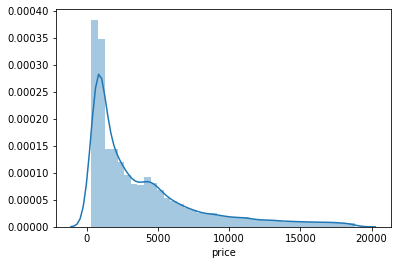

In [41]:
sns.distplot(data.price, bins = 40);

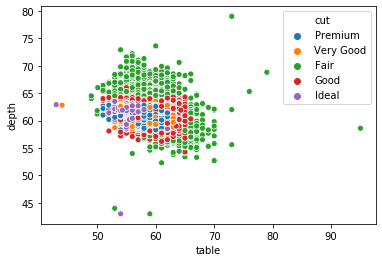

In [47]:
sns.scatterplot(data = data, x = 'table', y = 'depth', hue='cut')

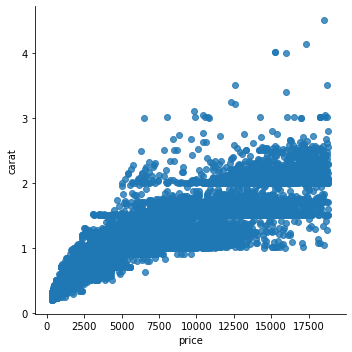

In [48]:
sns.lmplot(data=data, x='price', y='carat')

In [52]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.026550,0.183356,0.921918,0.977883,0.953384,0.969736
depth,0.026550,1.000000,-0.293039,-0.014851,-0.026277,-0.030880,0.094940
table,0.183356,-0.293039,1.000000,0.130071,0.197262,0.185864,0.156309
price,0.921918,-0.014851,0.130071,1.000000,0.887861,0.867782,0.876480
x,0.977883,-0.026277,0.197262,0.887861,1.000000,0.974064,0.984828
y,0.953384,-0.030880,0.185864,0.867782,0.974064,1.000000,0.965153
z,0.969736,0.094940,0.156309,0.876480,0.984828,0.965153,1.000000


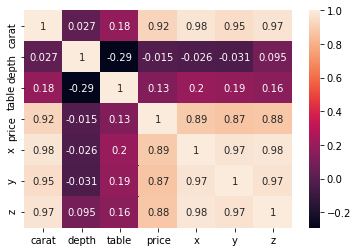

In [50]:
sns.heatmap(data.corr(), annot = True)

In [51]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.026550,0.183356,0.921918,0.977883,0.953384,0.969736
depth,0.026550,1.000000,-0.293039,-0.014851,-0.026277,-0.030880,0.094940
table,0.183356,-0.293039,1.000000,0.130071,0.197262,0.185864,0.156309
price,0.921918,-0.014851,0.130071,1.000000,0.887861,0.867782,0.876480
x,0.977883,-0.026277,0.197262,0.887861,1.000000,0.974064,0.984828
y,0.953384,-0.030880,0.185864,0.867782,0.974064,1.000000,0.965153
z,0.969736,0.094940,0.156309,0.876480,0.984828,0.965153,1.000000


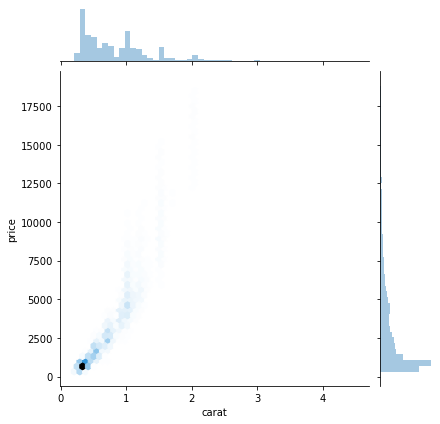

In [58]:
sns.jointplot(data=data, x='carat', y='price', kind='hex')